In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
T_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv", index_col='Unnamed: 0')
CS_data =  pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/Customer_support_data.csv")


In [27]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [28]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

In [29]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [30]:
CS_dummies = pd.get_dummies(CS_dropped)

In [4]:
CS_data

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


Задание 1

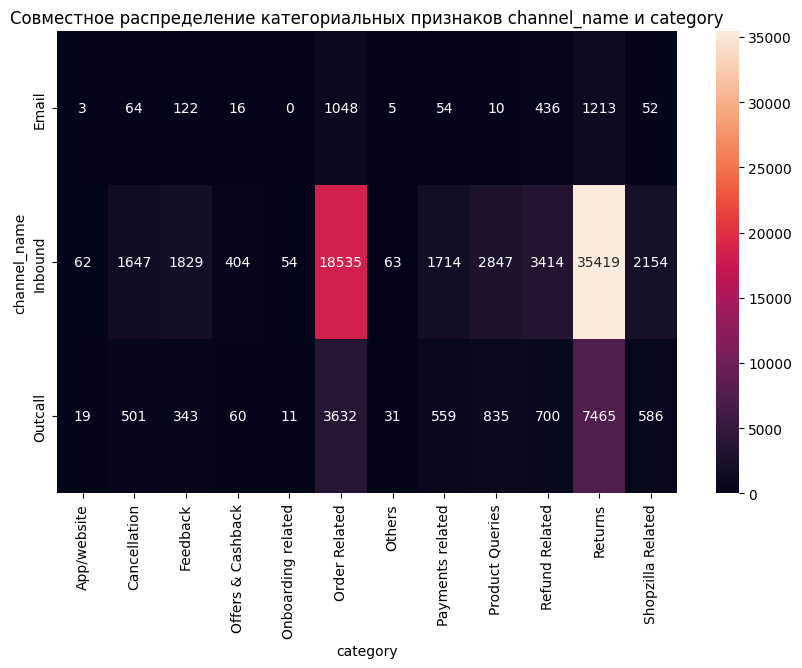

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(CS_data['channel_name'], CS_data['category']), annot=True, fmt='d')
plt.title('Совместное распределение категориальных признаков channel_name и category')
plt.show()


люди чаще звонят по поводу отказов или возврата, чем пишукт на почту

Задание 2

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Разделим данные на признаки X и целевую переменную y
X = CS_dummies.drop('CSAT Score', axis=1)
y = CS_dummies['CSAT Score']



# обучим модель
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Выведем отчет о классификации
print(classification_report(y_test, y_pred))

feature_importances = tree_clf.feature_importances_
feature_names = X.columns

# Сортировка признаков по важности
sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

# Вывод важности признаков
i = 0
print("Важность признаков:")
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.4f}")
    i +=1
    if i == 10:
      break


              precision    recall  f1-score   support

           1       0.26      0.05      0.08      2241
           2       0.00      0.00      0.00       227
           3       0.03      0.00      0.00       503
           4       0.15      0.01      0.02      2277
           5       0.70      0.97      0.81     11934

    accuracy                           0.68     17182
   macro avg       0.23      0.21      0.18     17182
weighted avg       0.54      0.68      0.58     17182

Важность признаков:
Product_category_unknown: 0.0729
channel_name_Inbound: 0.0506
channel_name_Email: 0.0487
category_Returns: 0.0465
channel_name_Outcall: 0.0437
Agent Shift_Morning: 0.0399
Agent Shift_Evening: 0.0380
Tenure Bucket_>90: 0.0355
Tenure Bucket_31-60: 0.0349
Manager_Michael Lee: 0.0321


In [16]:
CS_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   connected_handling_time                       242 non-null    float64
 1   CSAT Score                                    85907 non-null  int64  
 2   channel_name_Email                            85907 non-null  bool   
 3   channel_name_Inbound                          85907 non-null  bool   
 4   channel_name_Outcall                          85907 non-null  bool   
 5   category_App/website                          85907 non-null  bool   
 6   category_Cancellation                         85907 non-null  bool   
 7   category_Feedback                             85907 non-null  bool   
 8   category_Offers & Cashback                    85907 non-null  bool   
 9   category_Onboarding related                   85907 non-null 

Задание 3


In [31]:
X = CS_data.drop('CSAT Score', axis=1)
y = CS_data['CSAT Score']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X_train.shape[0], X_test.shape[0]

(68725, 17182)